#  <span style="font-family: Arial; font-weight:bold;font-size:1em;color:#00b3e5;"> <m>Contents:

[Problem 1 - Time Series Analysis for Rose wine](#Problem_1)
    
    Questions:
[1.1](#1.1)
[1.2](#1.2)
[1.3](#1.3)
[1.4](#1.4)
[1.5](#1.5)
[1.6](#1.6)
[1.7](#1.7)
[1.8](#1.8)
[1.9](#1.9)
[1.10](#1.10)

## <span style="font-family: Arial; font-weight:bold;font-size:1em;color:black"> <u> Problem 1 - Time Series Analysis
<a id='Problem_1'></a>
    
<font color=darkblue>For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

 </font> 

In [1]:
#Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import month_plot,plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA


#Filter warnings
import warnings
warnings.filterwarnings('ignore')

<b> 1.1) Read the data as an appropriate Time Series data and plot the data. </b>
<a id='1.1'></a>

In [2]:
#Import the Sparking dataset
df = pd.read_csv("Rose.csv")
display(df.head(),df.tail())

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


In [3]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [4]:
# Adding the time stamp to the data frame
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


In [5]:
df.drop('YearMonth', axis = 1, inplace = True)
df.set_index('Time_Stamp',inplace=True)
display(df.head(),df.tail())

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


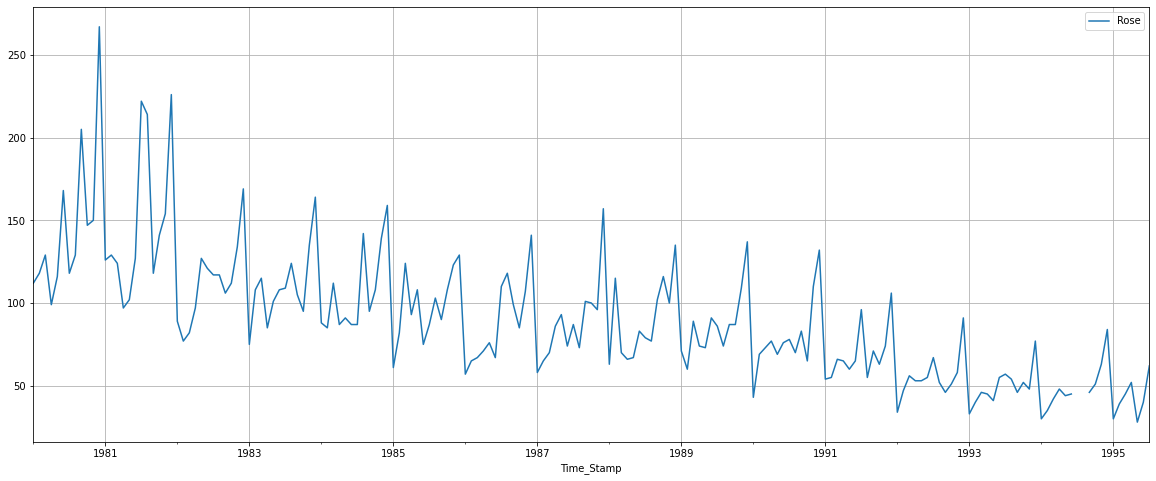

In [6]:
#Plot the data
df.plot()
plt.grid();

In [7]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


<b> 1.2) Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition. </b>
<a id='1.2'></a>

In [9]:
df.loc[df['Rose'].isnull()]

,Rose
Time_Stamp,
1994-07-31,NaN
1994-08-31,NaN


In [10]:
df['month'] = df.index.month
df['year'] = df.index.year

In [11]:
df[['month','Rose']][(df['year'] == 1993) | (df['year'] == 1992)].groupby('month').mean()

,Rose
month,
1,33.5
2,43.5
3,51.0
4,49.0
5,47.0
6,55.0
7,62.0
8,53.0
9,46.0


In [12]:
df[(df.index.year == 1994) & (df.index.month == 7)] = df[(df.index.year == 1994) & (df.index.month == 7)].replace(to_replace = np.nan , value = 62.0)

In [13]:
df[(df.index.year == 1994) & (df.index.month == 8)] = df[(df.index.year == 1994) & (df.index.month == 8)].replace(to_replace = np.nan , value = 53.0)

In [14]:
df.drop(['month','year'], axis = 1,inplace = True)

In [15]:
df.loc[df['Rose'].isnull()]

,Rose
Time_Stamp,


In [16]:
df[df.index. year == 1994]

,Rose
Time_Stamp,
1994-01-31,30.0
1994-02-28,35.0
1994-03-31,42.0
1994-04-30,48.0
1994-05-31,44.0
1994-06-30,45.0
1994-07-31,62.0
1994-08-31,53.0
1994-09-30,46.0


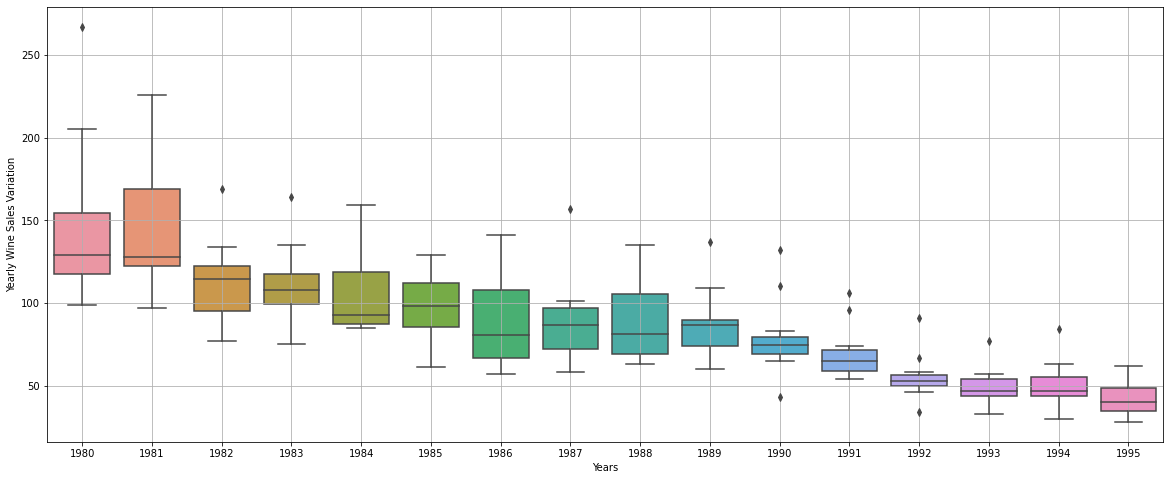

In [17]:
#Boxplot of year wise wine sales

sns.boxplot(df.index.year,df['Rose'])
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Sales Variation');

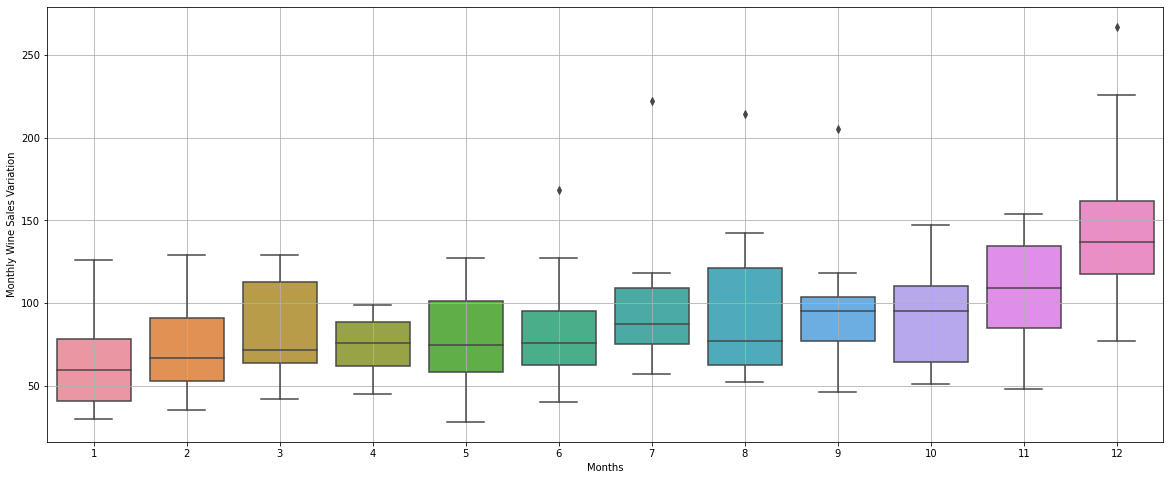

In [18]:
#Boxplot of month wise wine sales

sns.boxplot(df.index.month,df['Rose'])
plt.grid();
plt.xlabel('Months');
plt.ylabel('Monthly Wine Sales Variation');

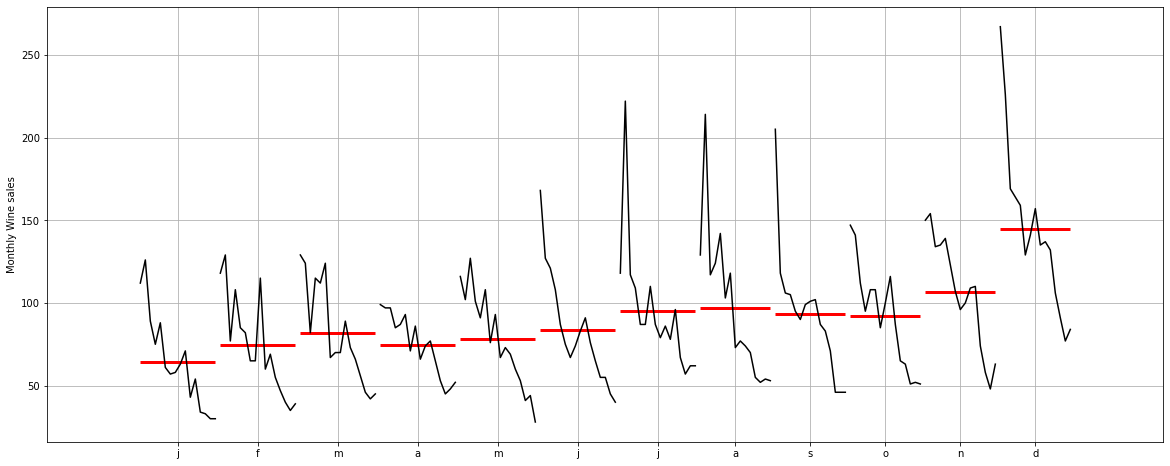

In [19]:
#Month plot 
month_plot(df,ylabel='Monthly Wine sales')
plt.grid();

In [20]:
#Pivot table for getting the yearly sales across months
y_months = pd.pivot_table(df,values = 'Rose',columns = df.index.month, index = df.index.year)
y_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


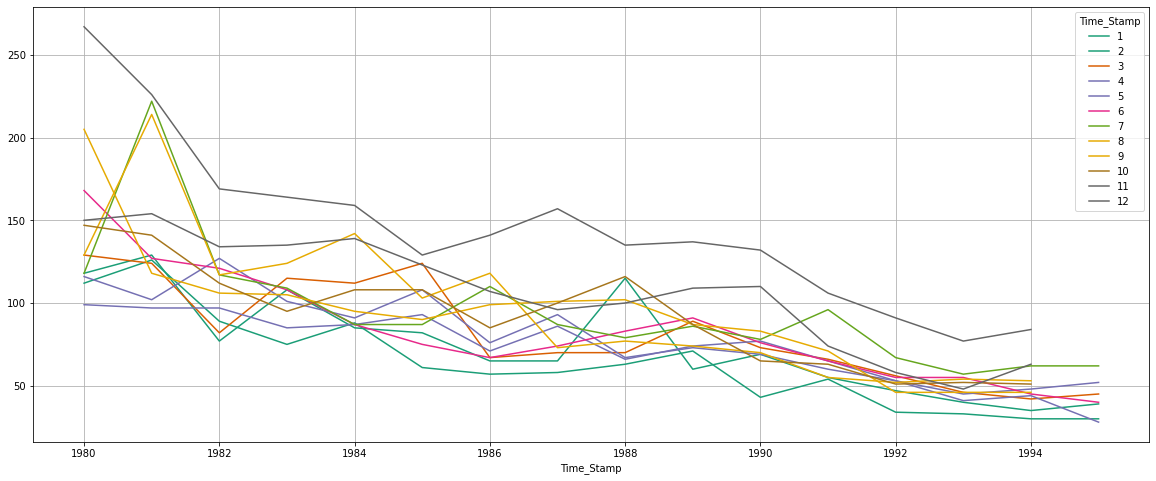

In [21]:
y_months.plot(colormap ='Dark2')
plt.grid();

,Rose
Time_Stamp,
1980-12-31,146.500000
1981-12-31,148.333333
1982-12-31,112.333333
1983-12-31,110.333333
1984-12-31,106.666667
1985-12-31,98.583333
1986-12-31,88.583333
1987-12-31,88.333333
1988-12-31,89.416667


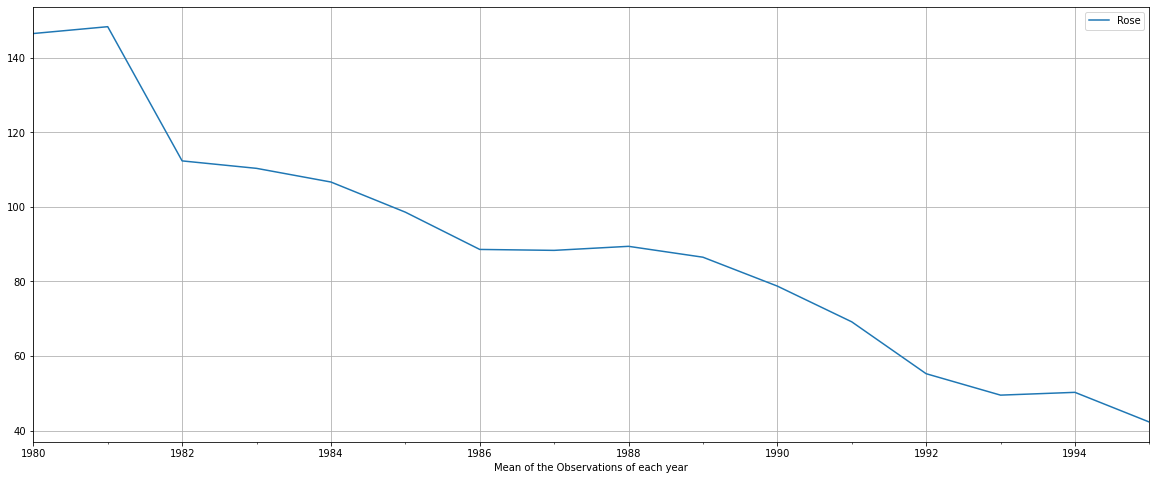

In [23]:
#Resample for Yearly plot

df_yearly = df.resample('A').mean()
display(df_yearly)

df_yearly.plot();
plt.grid();
plt.xlabel('Mean of the Observations of each year');

,Rose
Time_Stamp,
1980-03-31,119.666667
1980-06-30,127.666667
1980-09-30,150.666667
1980-12-31,188.000000
1981-03-31,126.333333
...,...
1994-09-30,53.666667
1994-12-31,66.000000
1995-03-31,38.000000


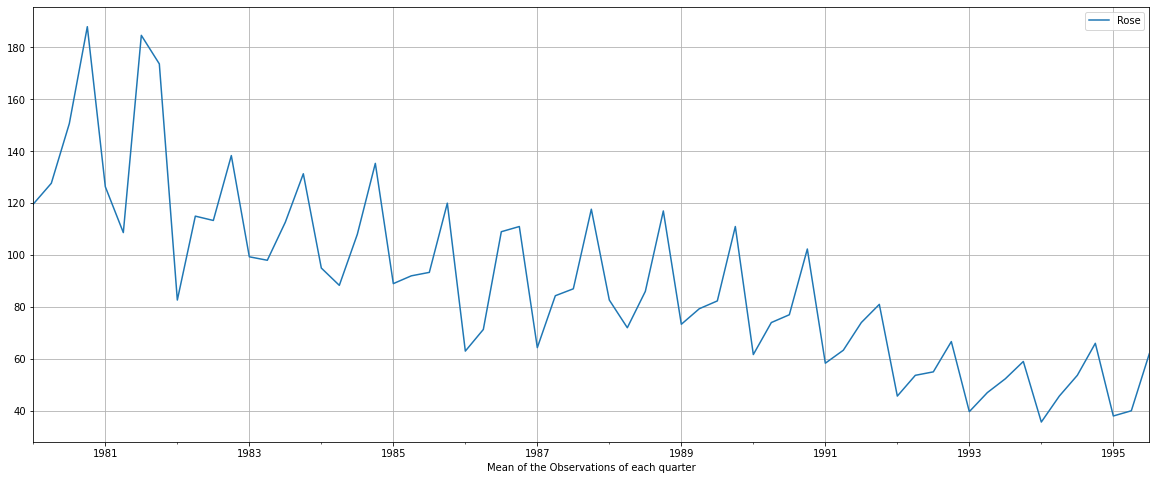

In [24]:
#Resample for Quarterly plot

df_quarterly = df.resample('Q').mean()
display(df_quarterly)

df_quarterly.plot();
plt.grid();
plt.xlabel('Mean of the Observations of each quarter');

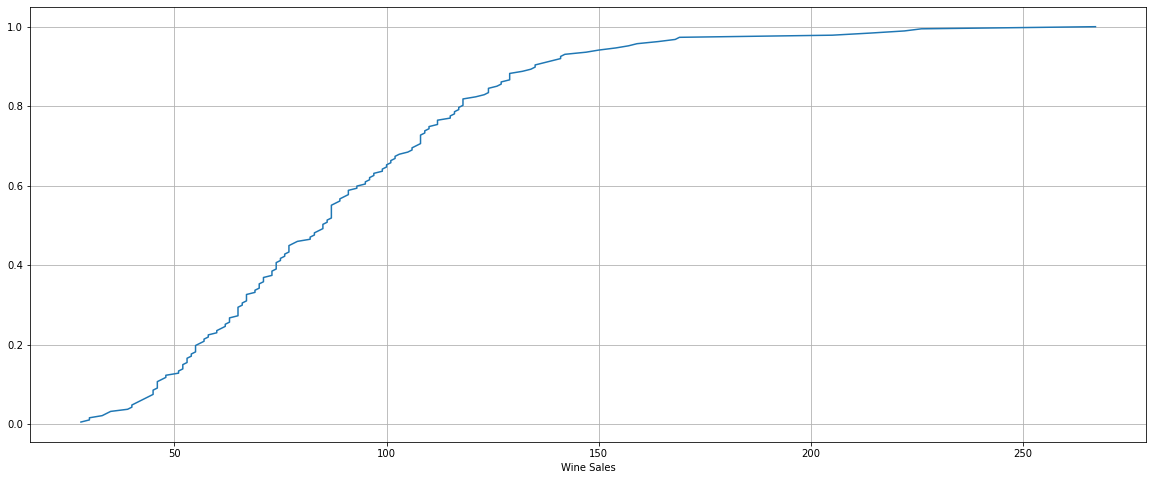

In [25]:
#Empirical cummulative distribution plot

cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "ECDF Plot");
plt.grid()
plt.xlabel('Wine Sales');

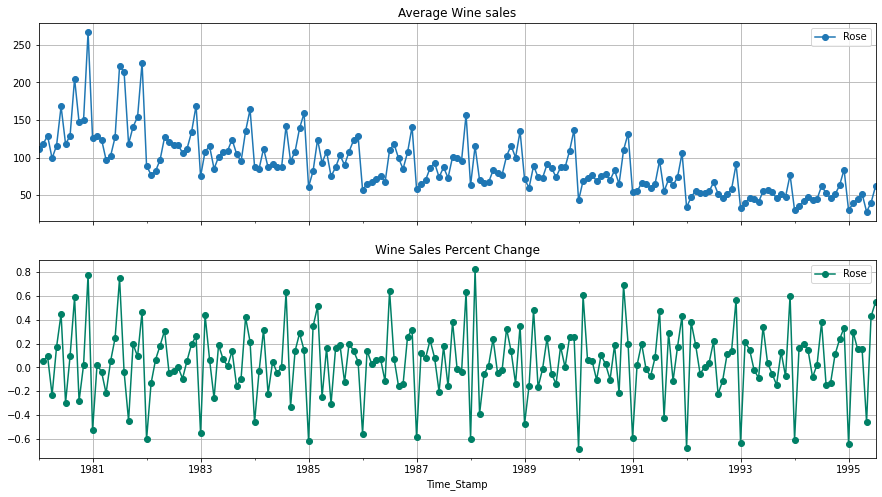

In [26]:
# group by date and get average RetailSales, and precent change
average    = df.groupby(df.index)["Rose"].mean()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Wine sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Wine Sales Percent Change",grid=True)

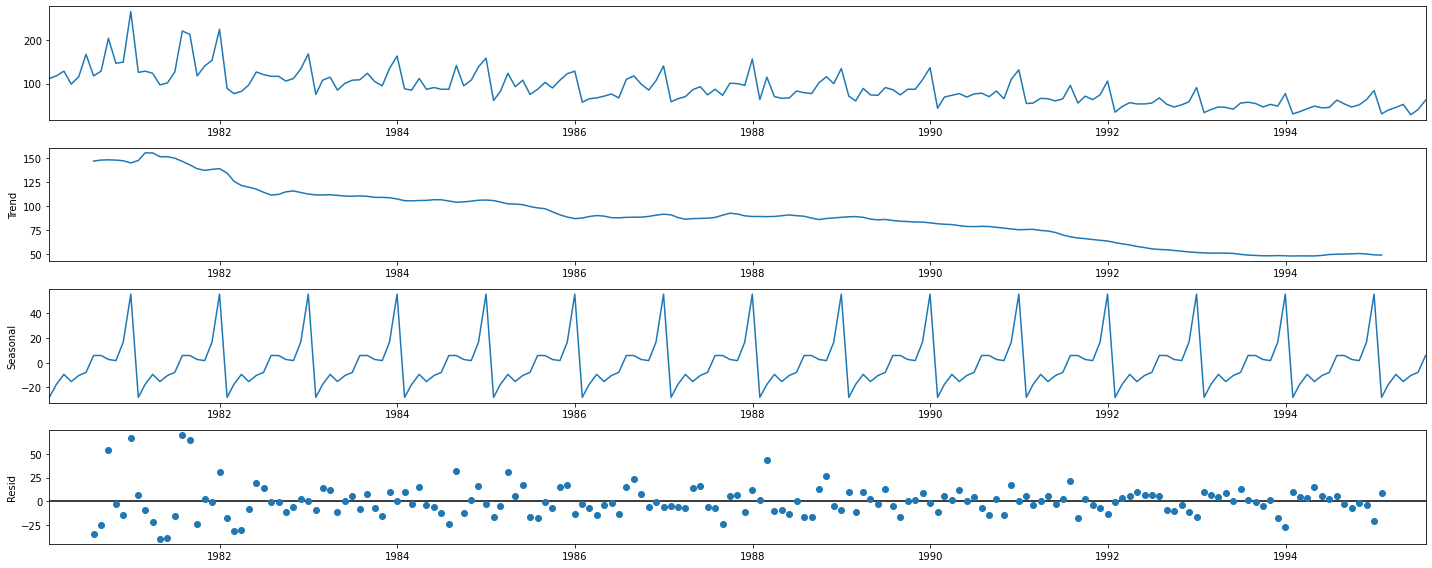

In [27]:
#Additive decomposition

decomp_add = seasonal_decompose(df,model='additive')
decomp_add.plot();

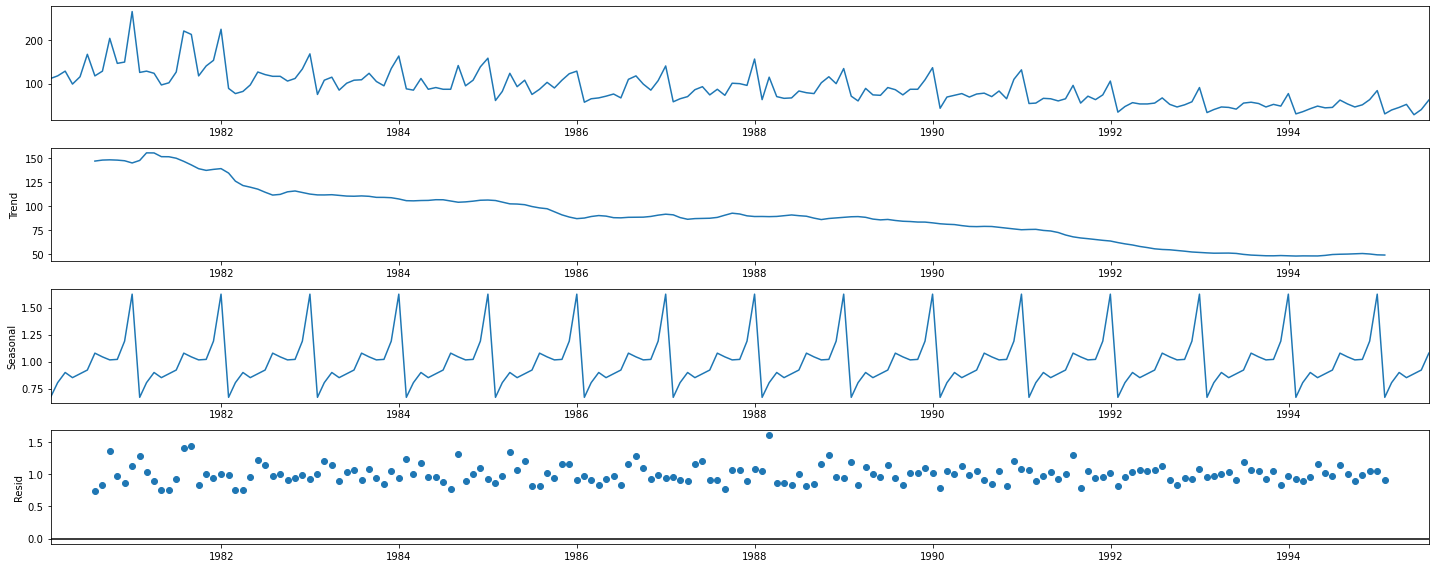

In [28]:
#Multiplicative decomposition

decomp_mul = seasonal_decompose(df,model='multiplicative')
decomp_mul.plot();

In [29]:
trend = decomp_mul.trend
seasonality = decomp_mul.seasonal
residual = decomp_mul.resid

trend1 = decomp_add.trend
seasonality1 = decomp_add.seasonal
residual1 = decomp_add.resid


Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
dtype: float64

Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
dtype: float64

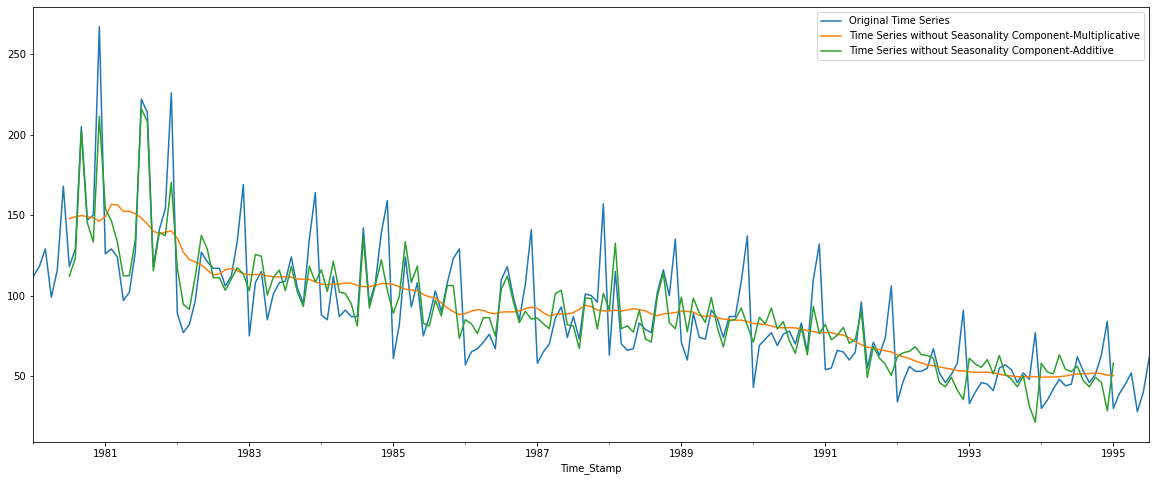

In [30]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts_add = trend1 + residual1
display(deaseasonalized_ts.head(),deaseasonalized_ts_add.head())

df.plot()
deaseasonalized_ts.plot()
deaseasonalized_ts_add.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component-Multiplicative",'Time Series without Seasonality Component-Additive']);

<b> 1.3) Split the data into training and test. The test data should start in 1991. </b>
<a id='1.3'></a>

In [31]:
#Split the data

train    =   df[df.index.year < 1991] 
test     =   df[df.index.year >=1991]

#Shape of test and train
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [32]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



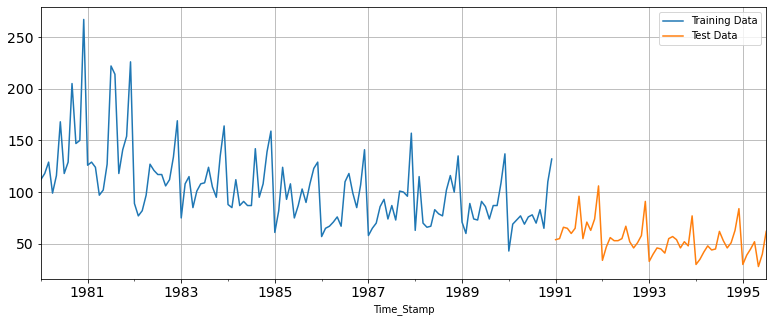

In [33]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

<b> 1.4) Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE. </b>
<a id='1.4'></a>

In [34]:
#Defining a function for performance on test data using RMSE
main_res = pd.DataFrame()
def performance(pred, model):
    #Test data RMSE
    rmse_test = mean_squared_error(test['Rose'],pred,squared=False)
    print("For {} forecast on the Test Data,  RMSE is {}" .format(model,(rmse_test).round(3)))
    result= pd.DataFrame({'Test RMSE': [rmse_test]},index=[model])
    return(result)


###### Model 1: Linear Regression

In [35]:
#Adding a time variable to the dataset
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [36]:
#Create a copy of the original dataset

LR_train = train.copy()
LR_test = test.copy()

LR_train['time'] = train_time
LR_test['time'] = test_time

print('First few rows of Training Data','\n',LR_train.head(),'\n')
print('Last few rows of Training Data','\n',LR_train.tail(),'\n')
print('First few rows of Test Data','\n',LR_test.head(),'\n')
print('Last few rows of Test Data','\n',LR_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



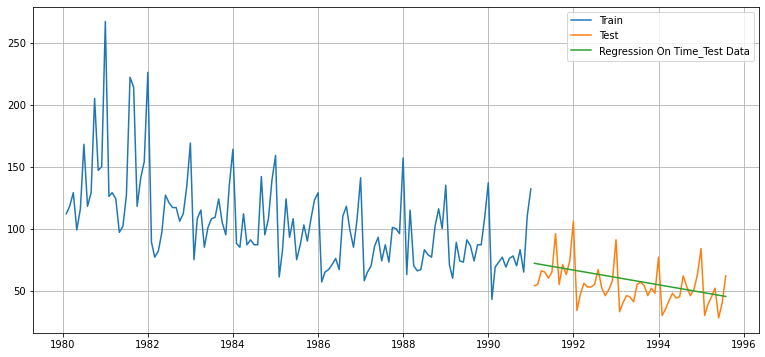

In [37]:
#Build the model
lr = LinearRegression()
#Fit the model
lr.fit(LR_train[['time']],LR_train['Rose'].values)

test_pred_LR  = lr.predict(LR_test[['time']])
LR_test['RegOnTime'] = test_pred_LR

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LR_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [38]:
#Model performance

res1 = performance(test_pred_LR,'Linear Regression')
main_res = pd.concat([main_res,res1])
main_res

For Linear Regression forecast on the Test Data,  RMSE is 15.303


,Test RMSE
Linear Regression,15.303047


###### Naive model

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

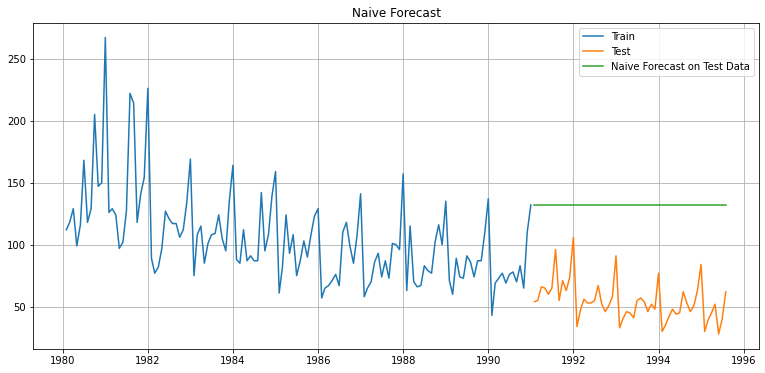

In [39]:
#Create a copy of the original dataset
NM_train = train.copy()
NM_test = test.copy()
#Creating a column in test dataset with value of last entry in train dataset
NM_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
display(NM_test['naive'].head())
#Plotting with the original dataset
plt.figure(figsize=(13,6))
plt.plot(NM_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NM_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [40]:
#Model performance

res2 = performance(NM_test['naive'],'Naive Model')
main_res = pd.concat([main_res,res2])
main_res

For Naive Model forecast on the Test Data,  RMSE is 79.282


,Test RMSE
Linear Regression,15.303047
Naive Model,79.281547


###### Simple Average model

Time_Stamp
1991-01-31    104.939394
1991-02-28    104.939394
1991-03-31    104.939394
1991-04-30    104.939394
1991-05-31    104.939394
Name: average, dtype: float64

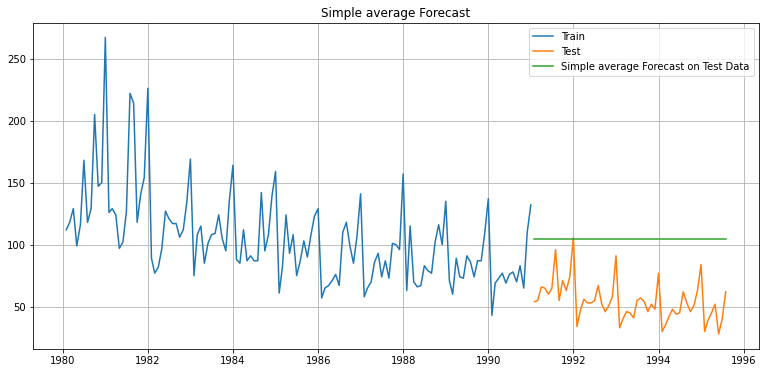

In [41]:
#Create a copy of the original dataset
SA_train = train.copy()
SA_test = test.copy()
#Creating a column in test dataset with value of last entry in train dataset
SA_test['average'] = train['Rose'].mean()
display(SA_test['average'].head())
#Plotting with the original dataset
plt.figure(figsize=(13,6))
plt.plot(SA_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(SA_test['average'], label='Simple average Forecast on Test Data')
plt.legend(loc='best')
plt.title("Simple average Forecast")
plt.grid();

In [42]:
#Model performance

res3 = performance(SA_test['average'],'Simple Average Model')
main_res = pd.concat([main_res,res3])
main_res

For Simple Average Model forecast on the Test Data,  RMSE is 53.03


,Test RMSE
Linear Regression,15.303047
Naive Model,79.281547
Simple Average Model,53.029519


###### Moving Average model

In [46]:
#Create a copy of the original dataset
MA = df.copy()

#Create a loop for trailing averages from 2-10
for i in range(2,28,4):
    MA[i] = MA['Rose'].rolling(i).mean()
MA.head()

,Rose,2,6,10,14,18,22,26
Time_Stamp,,,,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN,NaN,NaN,NaN
1980-04-30,99.0,114.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-05-31,116.0,107.5,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#Creating train and test set 
MA_train=MA[MA.index.year < 1991] 
MA_test=MA[MA.index.year >= 1991]

In [45]:
#Model performance for all the trailing averages

res4 = performance(MA_test[2],'2 point Moving Average Model')
performance(MA_test[6],'6 point Moving Average Model')
performance(MA_test[10],'10 point Moving Average Model')
performance(MA_test[14],'14 point Moving Average Model')
performance(MA_test[18],'18 point Moving Average Model')
performance(MA_test[22],'22 point Moving Average Model')
performance(MA_test[26],'26 point Moving Average Model')

main_res = pd.concat([main_res,res4])
display(main_res)

For 2 point Moving Average Model forecast on the Test Data,  RMSE is 11.612
For 6 point Moving Average Model forecast on the Test Data,  RMSE is 14.575
For 10 point Moving Average Model forecast on the Test Data,  RMSE is 15.05
For 14 point Moving Average Model forecast on the Test Data,  RMSE is 14.684
For 18 point Moving Average Model forecast on the Test Data,  RMSE is 15.924
For 22 point Moving Average Model forecast on the Test Data,  RMSE is 16.637
For 26 point Moving Average Model forecast on the Test Data,  RMSE is 16.881


,Test RMSE
Linear Regression,15.303047
Naive Model,79.281547
Simple Average Model,53.029519
2 point Moving Average Model,11.611515


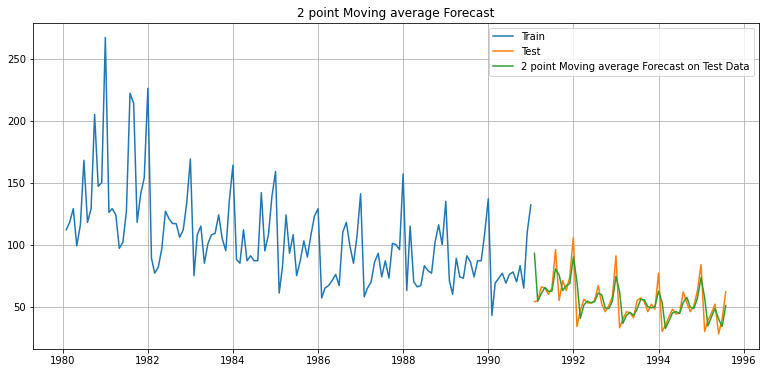

In [47]:
#Plotting with the original dataset
plt.figure(figsize=(13,6))
plt.plot(MA_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(MA_test[2], label='2 point Moving average Forecast on Test Data')
plt.legend(loc='best')
plt.title("2 point Moving average Forecast")
plt.grid();

###### Single Exponential Model

In [48]:
#Create a copy of the original dataset
SES_train = train.copy()
SES_test = test.copy()

In [55]:
#Define an empty dataframe to store our values from the loop
df_1 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})

#Defining the model
model_SES = SimpleExpSmoothing(SES_train['Rose'], initialization_method='estimated')

#Run a loop with different alpha values to understand which particular value works best for alpha on the test set.
for i in np.arange(0,1.1,0.1):
    model = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model.fittedvalues
    SES_test['predict',i] = model.forecast(steps=55)
    rmse_train_i = mean_squared_error(SES_train['Rose'],SES_train['predict',i],squared=False)
    rmse_test_i = mean_squared_error(SES_test['Rose'],SES_test['predict',i],squared=False)
    df_1 = df_1.append({'Alpha Values':i,'Train RMSE':rmse_train_i 
                                      ,'Test RMSE':rmse_test_i}, ignore_index=True)

display(df_1.sort_values(by=['Test RMSE'],ascending=True))

#Adding the least value in SES model to the main results dataframe
df1 = pd.DataFrame({'Test RMSE': [df_1.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1, SimpleExponentialSmoothing'])

main_res = pd.concat([main_res, df1])

,Alpha Values,Train RMSE,Test RMSE
1,0.1,32.253385,36.413383
2,0.2,32.155991,40.940330
3,0.3,32.559312,47.077358
0,0.0,36.417958,48.018957
4,0.4,33.089422,53.336208
5,0.5,33.721164,59.208294
6,0.6,34.470951,64.536345
7,0.7,35.347613,69.262271
8,0.8,36.354969,73.337467
9,0.9,37.500023,76.702326


In [56]:
main_res

,Test RMSE
Linear Regression,15.303047
Naive Model,79.281547
Simple Average Model,53.029519
2 point Moving Average Model,11.611515
"Alpha=0.1, SimpleExponentialSmoothing",36.413383


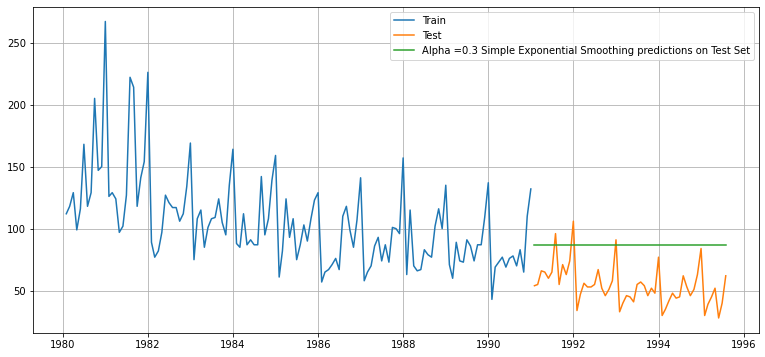

In [51]:
## Plotting on both the Training and Test data
plt.figure(figsize=(13,6))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

###### Double exponential model - Holts method

In [57]:
#Create a copy of the original dataset
DES_train = train.copy()
DES_test = test.copy()

In [58]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 5.448169774560283e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81762949544608, 'initial_trend': -0.4943507283995123, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [59]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict.head()

1991-01-31    72.068983
1991-02-28    71.574632
1991-03-31    71.080281
1991-04-30    70.585930
1991-05-31    70.091580
Freq: M, dtype: float64

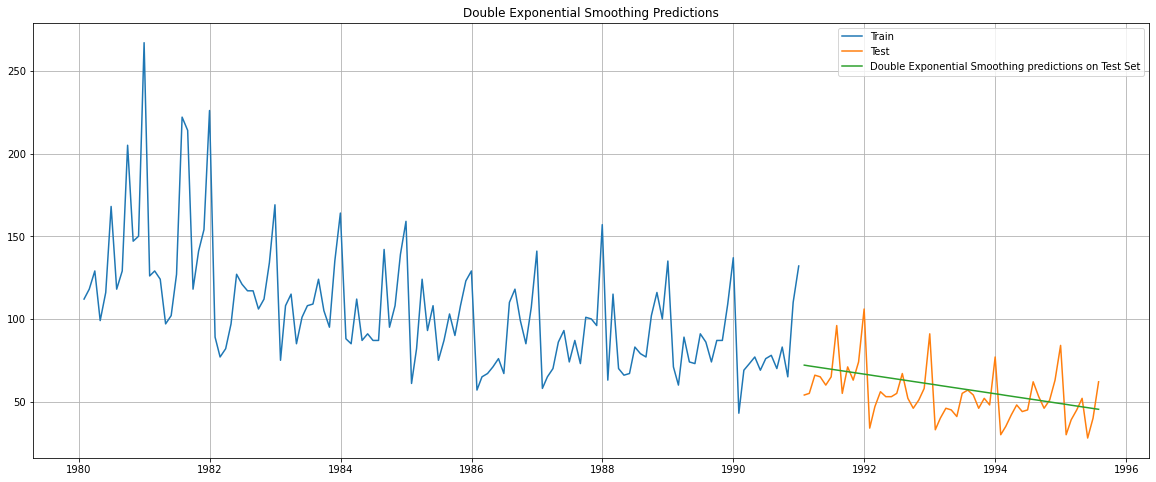

In [65]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions');

In [66]:
res5 = performance(DES_predict,'Double exponential Model')
main_res = pd.concat([main_res, res5])
display(main_res)

For Double exponential Model forecast on the Test Data,  RMSE is 15.305


,Test RMSE
Linear Regression,15.303047
Naive Model,79.281547
Simple Average Model,53.029519
2 point Moving Average Model,11.611515
"Alpha=0.1, SimpleExponentialSmoothing",36.413383
Double exponential Model,15.304860


In [70]:
#Define an empty dataframe to store our values from the loop
df_2 = pd.DataFrame({'Alpha Values':[], 'Beta Values':[], 'Train RMSE':[],'Test RMSE': []})

#Defining the model
model_DES = Holt(DES_train['Rose'], initialization_method='estimated')

#Run a loop with different alpha, beta values to understand which particular value works best for alpha,beta on the test set.
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        model = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model.fittedvalues
        DES_test['predict',i,j] = model.forecast(steps=55)
        rmse_train = mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        rmse_test = mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        df_2 = df_2.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_train
                                          ,'Test RMSE':rmse_test}, ignore_index=True)

display(df_2.sort_values(by=['Test RMSE'],ascending=True).head())

# Adding the least value in DES model to the main results dataframe
df2 = pd.DataFrame({'Test RMSE': [df_2.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                           ,index=['Alpha=0.1, Beta=0.1, DExponentialSmoothing'])

main_res = pd.concat([main_res, df2])
display(main_res)

,Alpha Values,Beta Values,Train RMSE,Test RMSE
12,0.1,0.1,35.120545,36.449278
13,0.1,0.2,33.990798,48.144702
23,0.2,0.1,33.274844,65.225862
14,0.1,0.3,33.518388,77.591204
34,0.3,0.1,33.673813,98.123817


,Test RMSE
Linear Regression,15.303047
Naive Model,79.281547
Simple Average Model,53.029519
2 point Moving Average Model,11.611515
"Alpha=0.1, SimpleExponentialSmoothing",36.413383
Double exponential Model,15.304860
"Alpha=0.1, Beta=0.1, DExponentialSmoothing",36.449278


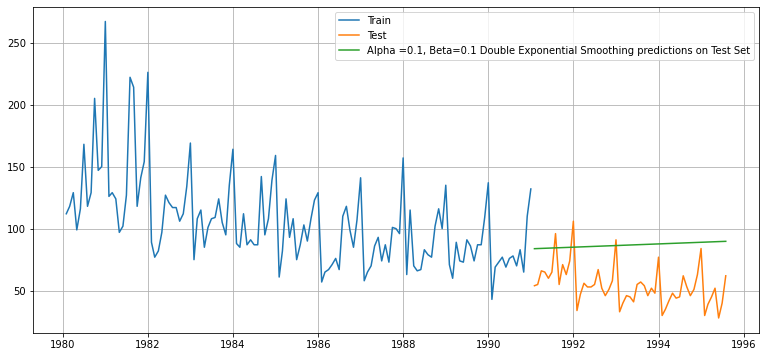

In [71]:
## Plotting on both the Training and Test data
plt.figure(figsize=(13,6))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha =0.1, Beta=0.1 Double Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

###### Triple Exponential Model - Holt WInters method

In [72]:
#Create a copy of the original dataset
TES_train = train.copy()
TES_test = test.copy()

In [89]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='add',seasonal='add',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08921274046260236, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 146.9091338480776, 'initial_trend': -0.548494191663101, 'initial_seasons': array([-31.47744104, -19.04421041, -11.02329046, -21.60363364,
       -12.75453941,  -7.20976107,   2.56475857,   8.63810938,
         4.65408379,   2.83084154,  21.03957984,  63.11907599]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [90]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict.head()

1991-01-31    42.472120
1991-02-28    54.356857
1991-03-31    61.829282
1991-04-30    50.700445
1991-05-31    59.001045
Freq: M, dtype: float64

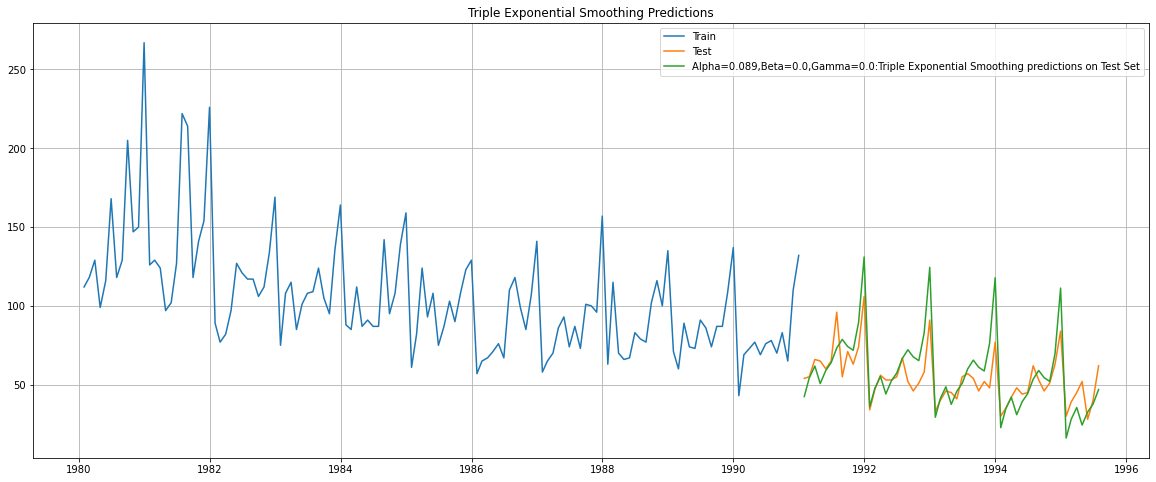

In [91]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(TES_predict, label='Alpha=0.089,Beta=0.0,Gamma=0.0:Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [92]:
res6 = performance(TES_predict,'Alpha=0.089, Beta=0.0, Gamma=0.0:Triple exponential Model')
res6
main_res = pd.concat([main_res, res6])
display(main_res)

For Alpha=0.089, Beta=0.0, Gamma=0.0:Triple exponential Model forecast on the Test Data,  RMSE is 14.188


,Test RMSE
Linear Regression,15.303047
Naive Model,79.281547
Simple Average Model,53.029519
2 point Moving Average Model,11.611515
"Alpha=0.1, SimpleExponentialSmoothing",36.413383
Double exponential Model,15.304860
"Alpha=0.1, Beta=0.1, DExponentialSmoothing",36.449278
"Alpha=0.089, Beta=0.0, Gamma=0.0:Triple exponential Model",14.187579


In [101]:
#Define an empty dataframe to store our values from the loop
df_3 = pd.DataFrame({'Alpha Values':[], 'Beta Values':[], 'Gamma Values': [], 'Train RMSE':[],'Test RMSE': []})

#Defining the model
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive',initialization_method='estimated')

#Run a loop with different alpha, beta values to understand which particular value works best for alpha,beta on the test set.
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        for k in np.arange(0,1.1,0.1):
            model = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model.fittedvalues
            TES_test['predict',i,j,k] = model.forecast(steps=55)  
            rmse_train = mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k],squared=False)     
            rmse_test = mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k],squared=False)        
            df_3 = df_3.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_train,'Test RMSE':rmse_test}
                                                 , ignore_index=True)

display(df_3.sort_values(by=['Test RMSE'],ascending=True).head())

# Adding the least value in DES model to the main results dataframe
df3 = pd.DataFrame({'Test RMSE': [df_3.sort_values(by=['Test RMSE'],ascending=True).values[0][4]]}
                           ,index=['Alpha=0.1, Beta=0.4, Gamma=0.3, TripleExponentialSmoothing'])

main_res = pd.concat([main_res, df3])
display(main_res)

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
168,0.1,0.4,0.3,22.673408,12.256893
157,0.1,0.3,0.3,22.293608,12.306856
147,0.1,0.2,0.4,22.544393,12.348600
146,0.1,0.2,0.3,22.006153,12.399858
158,0.1,0.3,0.4,22.893136,12.433018


,Test RMSE
Linear Regression,15.303047
Naive Model,79.281547
Simple Average Model,53.029519
2 point Moving Average Model,11.611515
"Alpha=0.1, SimpleExponentialSmoothing",36.413383
Double exponential Model,15.304860
"Alpha=0.1, Beta=0.1, DExponentialSmoothing",36.449278
"Alpha=0.089, Beta=0.0, Gamma=0.0:Triple exponential Model",14.187579
"Alpha=0.1, Beta=0.4, Gamma=0.3, TripleExponentialSmoothing",12.256893


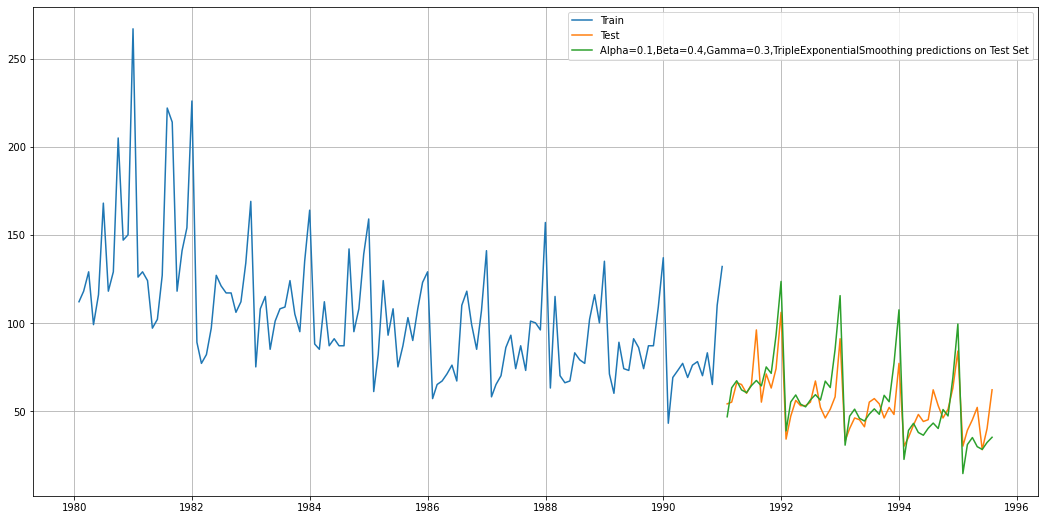

In [114]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')
plt.plot(TES_test['predict', 0.19, 0.4, 0.30000000000000004], label='Alpha=0.1,Beta=0.4,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

<b> 1.5) Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05. </b>
<a id='1.5'></a>

In [115]:
## Test for stationarity of the whole series - Augumented Dicky Fuller test


def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=12).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

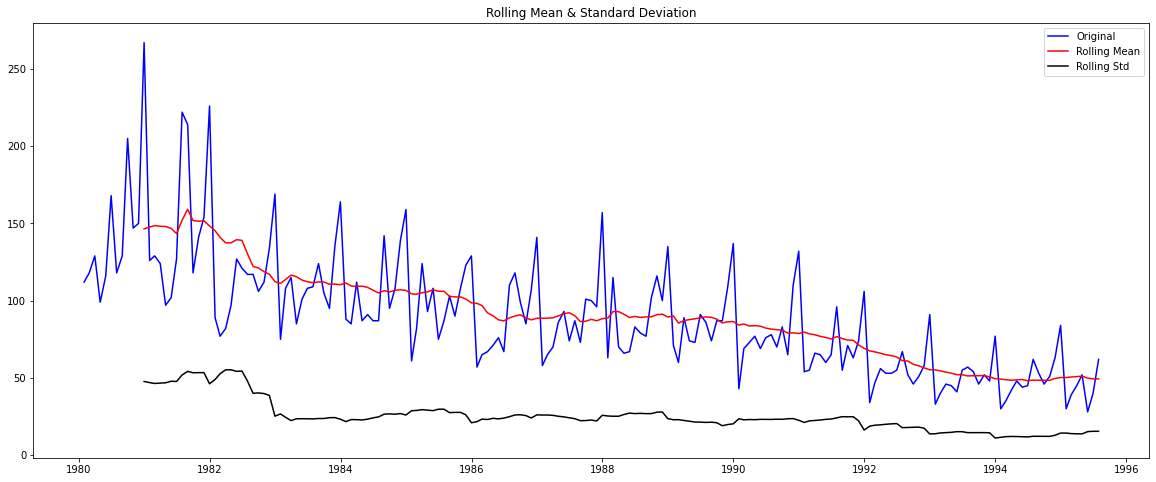

Results of Dickey-Fuller Test:
Test Statistic                  -1.887760
p-value                          0.337841
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [116]:
test_stationarity(df['Rose'])

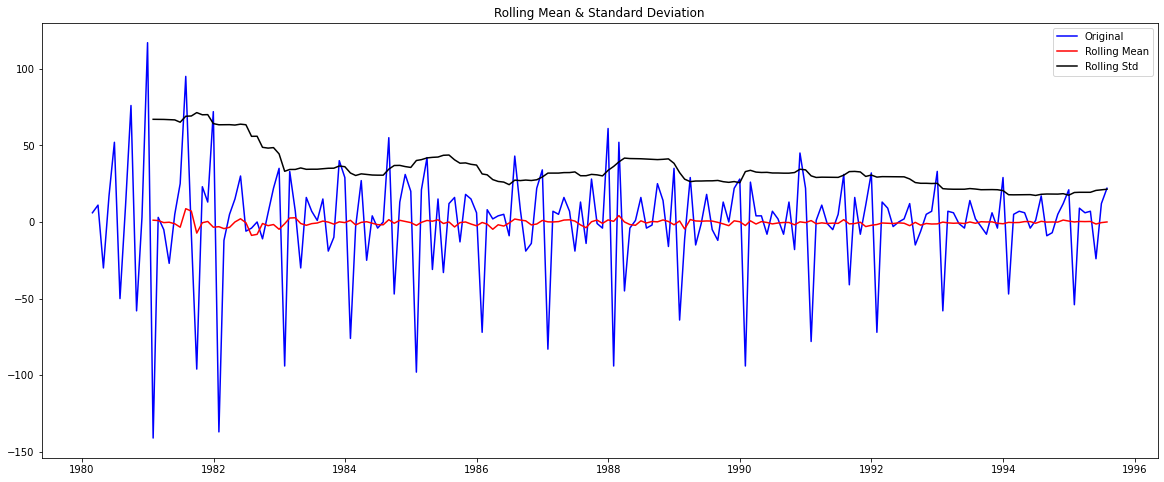

Results of Dickey-Fuller Test:
Test Statistic                -8.028518e+00
p-value                        1.987167e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [117]:
test_stationarity(df['Rose'].diff().dropna())

<b> 1.6) Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE. </b>
<a id='1.6'></a>

###### ARIMA

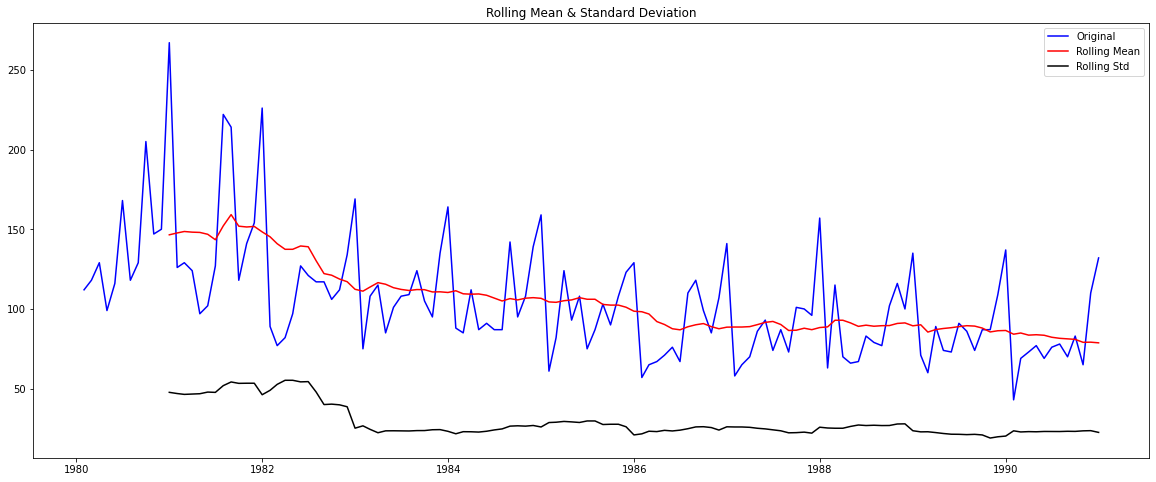

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [118]:
#Before building the model, Test stationarity of train series
test_stationarity(train['Rose'])

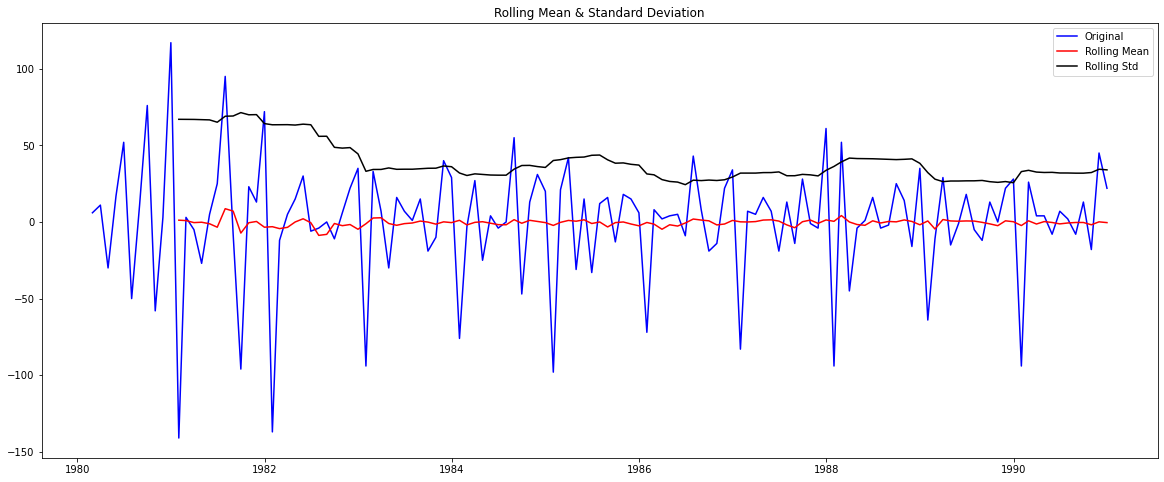

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [119]:
#Taking first order differencing
test_stationarity(train['Rose'].diff().dropna())

In [120]:
#Loop for different values of p,d,q
import itertools
p = q = range(0, 4)
d= range(1,2) #Since we took first order differencing
pdq = list(itertools.product(p, d, q))
print('Parameter combinations for the Model:')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Parameter combinations for the Model:
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [121]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [122]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
display(ARIMA_AIC.sort_values(by='AIC',ascending=True).head())

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464226
ARIMA(0, 1, 2) - AIC:1276.8353732503206
ARIMA(0, 1, 3) - AIC:1278.0742527597722
ARIMA(1, 1, 0) - AIC:1319.3483105806022
ARIMA(1, 1, 1) - AIC:1277.7757480591986
ARIMA(1, 1, 2) - AIC:1277.3592291243913
ARIMA(1, 1, 3) - AIC:1279.3126374362373
ARIMA(2, 1, 0) - AIC:1300.609261174395
ARIMA(2, 1, 1) - AIC:1279.0456894093109
ARIMA(2, 1, 2) - AIC:1279.298693936864
ARIMA(2, 1, 3) - AIC:1281.196226042498
ARIMA(3, 1, 0) - AIC:1299.4787391545829
ARIMA(3, 1, 1) - AIC:1279.6059630328155
ARIMA(3, 1, 2) - AIC:1280.9692455974628
ARIMA(3, 1, 3) - AIC:1273.1940943531044


,param,AIC
15,"(3, 1, 3)",1273.194094
2,"(0, 1, 2)",1276.835373
6,"(1, 1, 2)",1277.359229
5,"(1, 1, 1)",1277.775748
3,"(0, 1, 3)",1278.074253


In [123]:
#Build the model
auto_ARIMA = ARIMA(train['Rose'], order=(3,1,3), freq = 'M')
#Fit the model
results_auto_ARIMA = auto_ARIMA.fit()
#Summary
print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -628.597
Method:                       css-mle   S.D. of innovations             28.356
Date:                Sun, 28 Mar 2021   AIC                           1273.194
Time:                        15:40:02   BIC                           1296.196
Sample:                    02-29-1980   HQIC                          1282.541
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4906      0.088     -5.548      0.000      -0.664      -0.317
ar.L1.D.Rose    -0.7243      0.086     -8.403      0.000      -0.893      -0.555
ar.L2.D.Rose    -0.7218      0.087     -8.33

In [124]:
#Predict for the test data
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))
res5 = performance(predicted_auto_ARIMA[0], 'ARIMA_auto(3,1,3)')

main_res = pd.concat([main_res,res5])
display(main_res)

For ARIMA_auto(3,1,3) forecast on the Test Data,  RMSE is 16.217


,Test RMSE
Linear Regression,15.303047
Naive Model,79.281547
Simple Average Model,53.029519
2 point Moving Average Model,11.611515
"Alpha=0.1, SimpleExponentialSmoothing",36.413383
Double exponential Model,15.304860
"Alpha=0.1, Beta=0.1, DExponentialSmoothing",36.449278
"Alpha=0.089, Beta=0.0, Gamma=0.0:Triple exponential Model",14.187579
"Alpha=0.1, Beta=0.4, Gamma=0.3, TripleExponentialSmoothing",12.256893
"ARIMA_auto(3,1,3)",16.216939


###### SARIMA

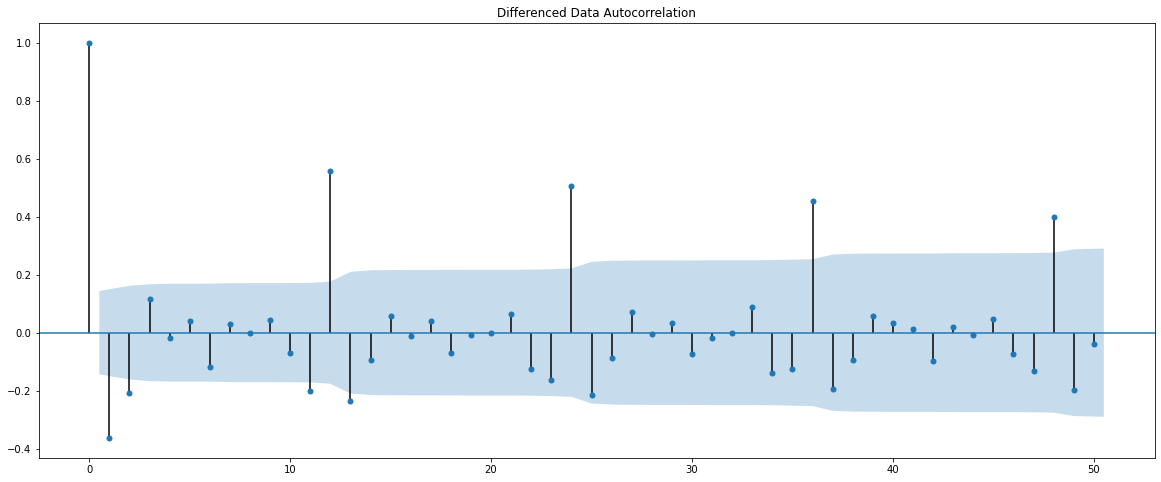

In [125]:
#Check for seasonality
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [169]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Parameter combinations for the Model:')
for i in range(0,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Parameter combinations for the Model:
Model: (0, 1, 0)(0, 0, 0, 12)
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [170]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [171]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207373
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380907
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301624719
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.8687014776095
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869385642
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.691363575319
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:975.3375383601609
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182654603
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697548
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945777
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:858.513269837442
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390729146768
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244225035
SARIMA(0, 1, 1)x(0, 0, 0, 

In [172]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(0, 1, 2)","(2, 1, 2, 12)",774.969119
107,"(1, 1, 2)","(2, 1, 2, 12)",776.940134
161,"(2, 1, 2)","(2, 1, 2, 12)",776.996100
35,"(0, 1, 1)","(2, 1, 2, 12)",782.153872
160,"(2, 1, 2)","(2, 1, 1, 12)",783.703652


In [173]:
auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Sun, 28 Mar 2021   AIC                            774.969
Time:                                    16:11:55   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.166      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

In [175]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

res6 = performance(predicted_auto_SARIMA.predicted_mean, 'SARIMA_auto(0,1,2)x(2,1,2,12)')
main_res = pd.concat([main_res,res6])
display(main_res)

For SARIMA_auto(0,1,2)x(2,1,2,12) forecast on the Test Data,  RMSE is 16.251


,Test RMSE
Linear Regression,15.303047
Naive Model,79.281547
Simple Average Model,53.029519
2 point Moving Average Model,11.611515
"Alpha=0.1, SimpleExponentialSmoothing",36.413383
Double exponential Model,15.304860
"Alpha=0.1, Beta=0.1, DExponentialSmoothing",36.449278
"Alpha=0.089, Beta=0.0, Gamma=0.0:Triple exponential Model",14.187579
"Alpha=0.1, Beta=0.4, Gamma=0.3, TripleExponentialSmoothing",12.256893
"ARIMA_auto(3,1,3)",16.216939


In [176]:
test1 = test.copy()
test1['pred'] = predicted_auto_SARIMA.predicted_mean
test1.head()

,Rose,pred
Time_Stamp,,
1991-01-31,54.0,44.213653
1991-02-28,55.0,62.326791
1991-03-31,66.0,67.313418
1991-04-30,65.0,63.161083
1991-05-31,60.0,66.474389


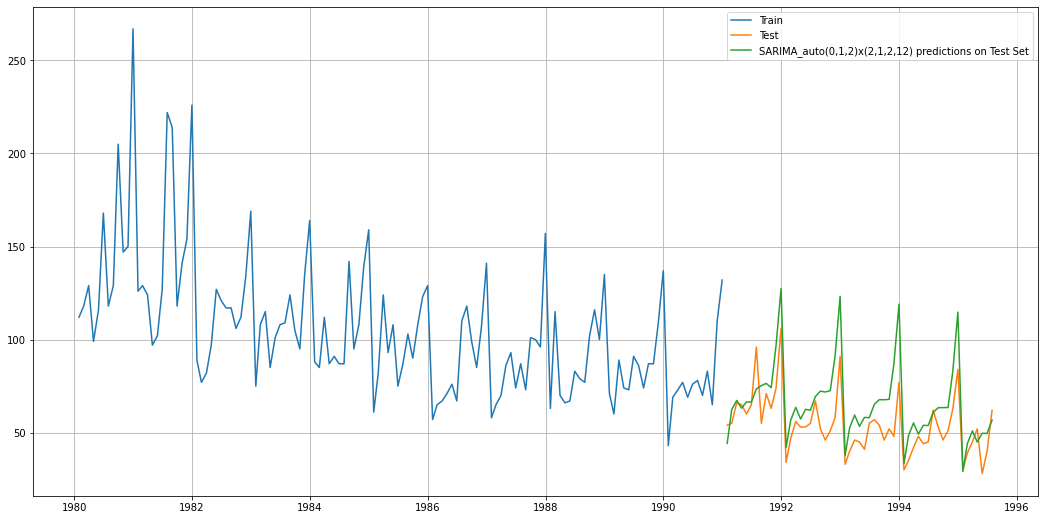

In [177]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(test1['pred'], label='SARIMA_auto(0,1,2)x(2,1,2,12) predictions on Test Set')
plt.legend(loc='best')
plt.grid();

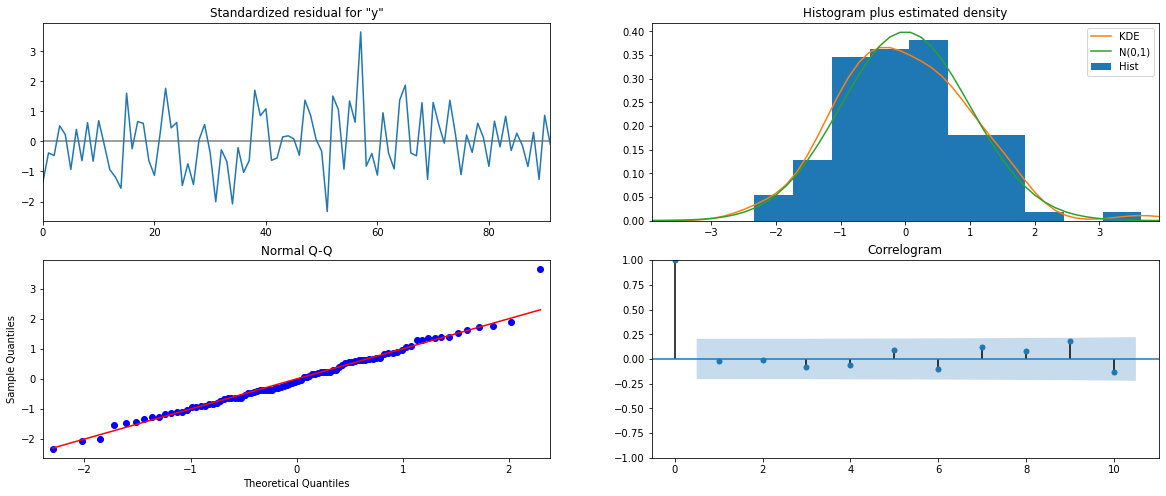

In [179]:
results_auto_SARIMA.plot_diagnostics();

<b> 1.7) Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE. </b>
<a id='1.7'></a>

###### ARIMA

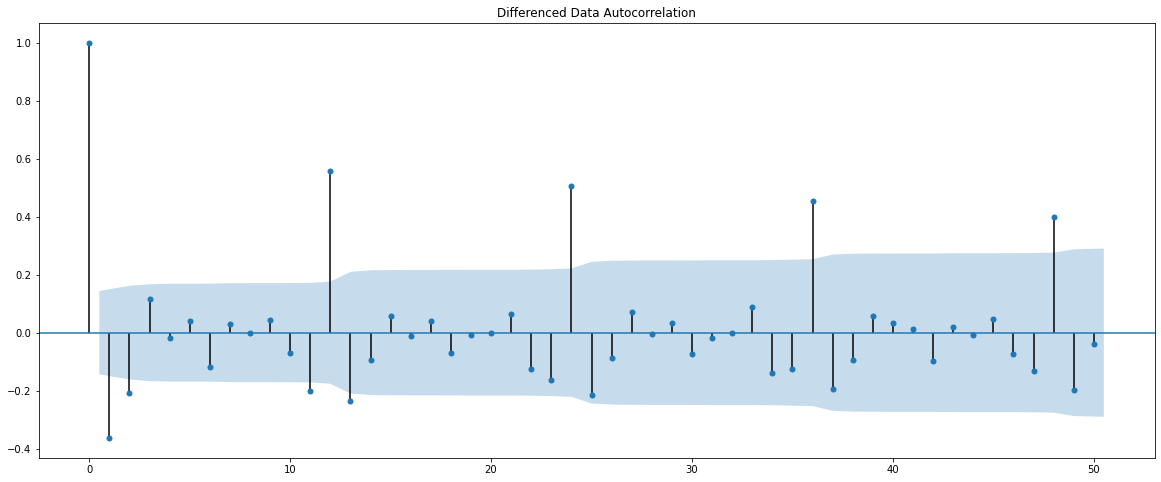

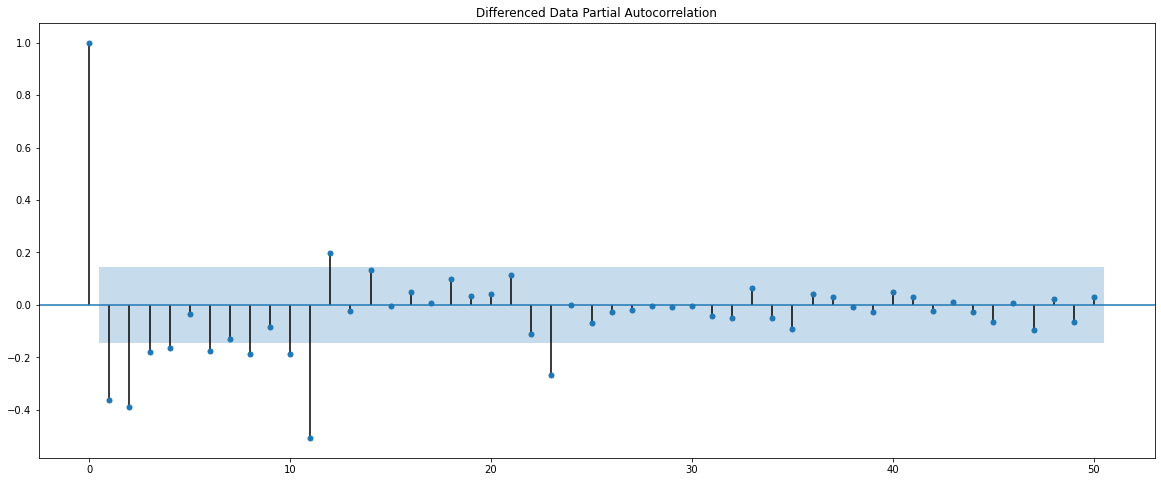

In [181]:
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation', method ='ywmle')
plt.show()

In [188]:
#Build the model
manual_ARIMA = ARIMA(train, order=(2,1,2), freq ='M')
#Fit the model
results_manual_ARIMA = manual_ARIMA.fit()
#Summary
print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 28 Mar 2021   AIC                           1279.299
Time:                        16:29:24   BIC                           1296.550
Sample:                    02-29-1980   HQIC                          1286.309
                         - 12-31-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Rose    -0.4383      0.218     -2.015      0.044      -0.865      -0.012
ar.L2.D.Rose     0.0269      0.109      0.24

In [189]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
res7 = performance(predicted_manual_ARIMA[0], 'ARIMA_manual(2,1,2)')

main_res = pd.concat([main_res,res7])
display(main_res)

For ARIMA_manual(2,1,2) forecast on the Test Data,  RMSE is 15.394


,Test RMSE
Linear Regression,15.303047
Naive Model,79.281547
Simple Average Model,53.029519
2 point Moving Average Model,11.611515
"Alpha=0.1, SimpleExponentialSmoothing",36.413383
Double exponential Model,15.304860
"Alpha=0.1, Beta=0.1, DExponentialSmoothing",36.449278
"Alpha=0.089, Beta=0.0, Gamma=0.0:Triple exponential Model",14.187579
"Alpha=0.1, Beta=0.4, Gamma=0.3, TripleExponentialSmoothing",12.256893
"ARIMA_auto(3,1,3)",16.216939


###### SARIMA

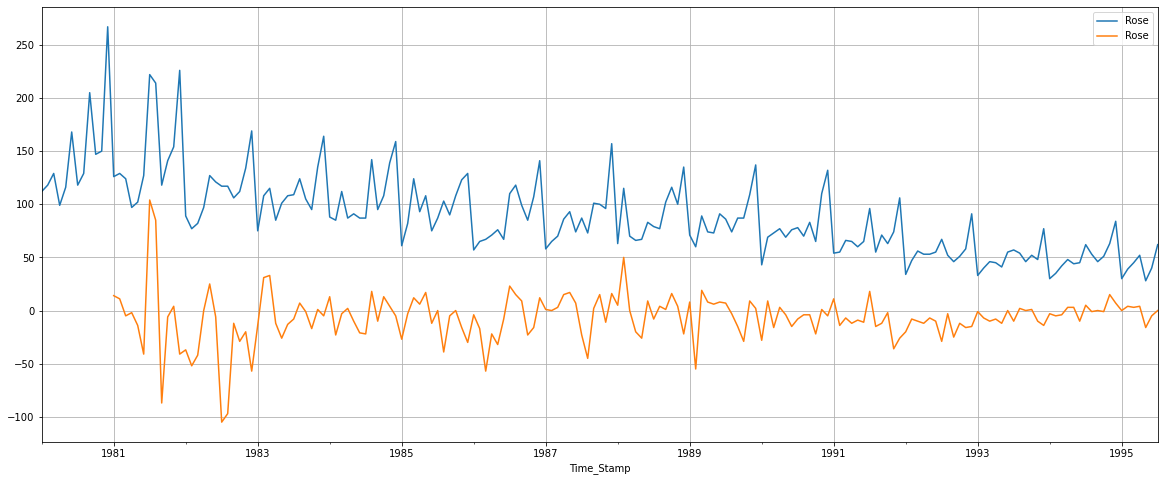

In [190]:
df.plot()
(df['Rose'].diff(12).dropna()).plot()
plt.legend()
plt.grid();

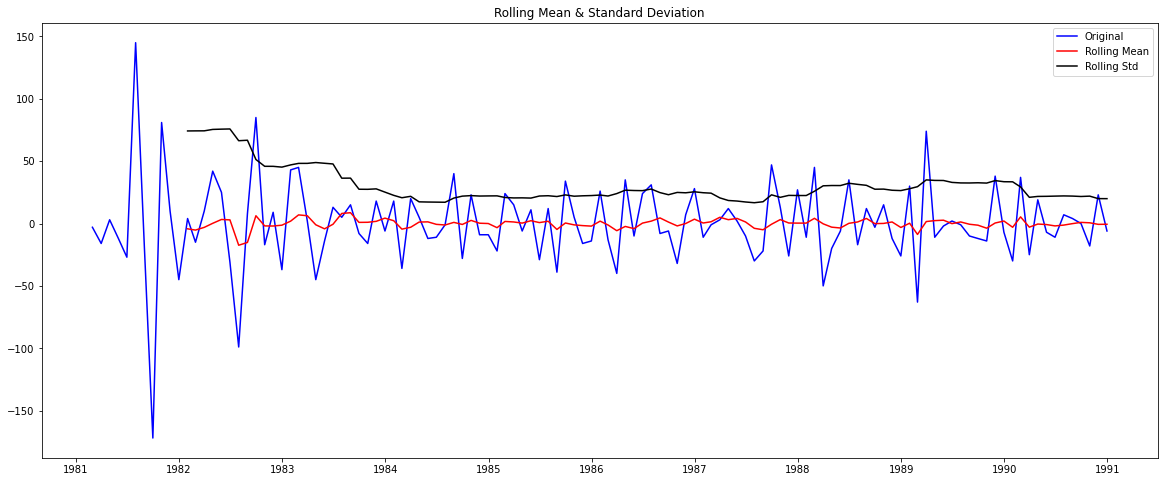

Results of Dickey-Fuller Test:
Test Statistic                  -3.692348
p-value                          0.004222
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [212]:
test_stationarity((train['Rose'].diff(12).dropna()).diff().dropna())

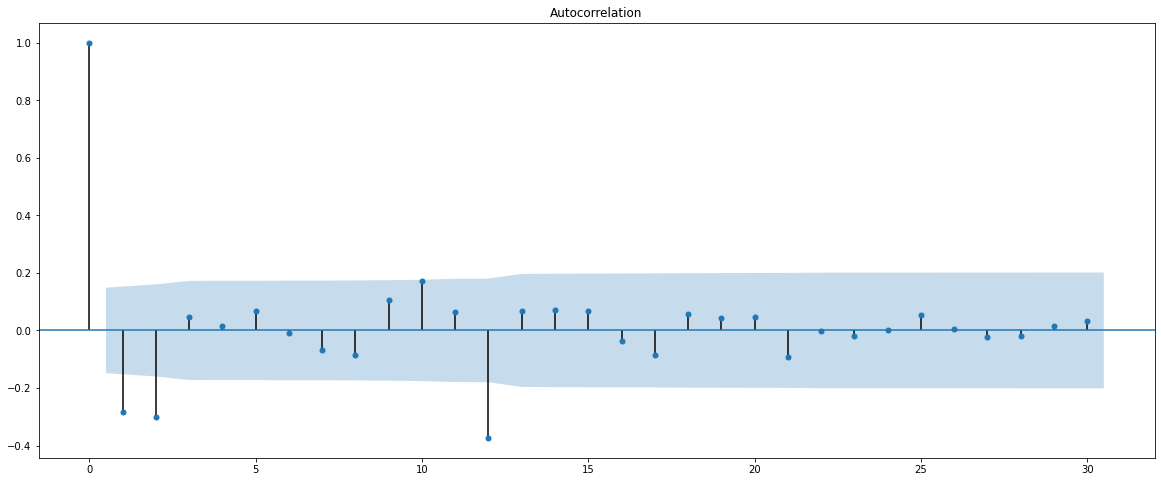

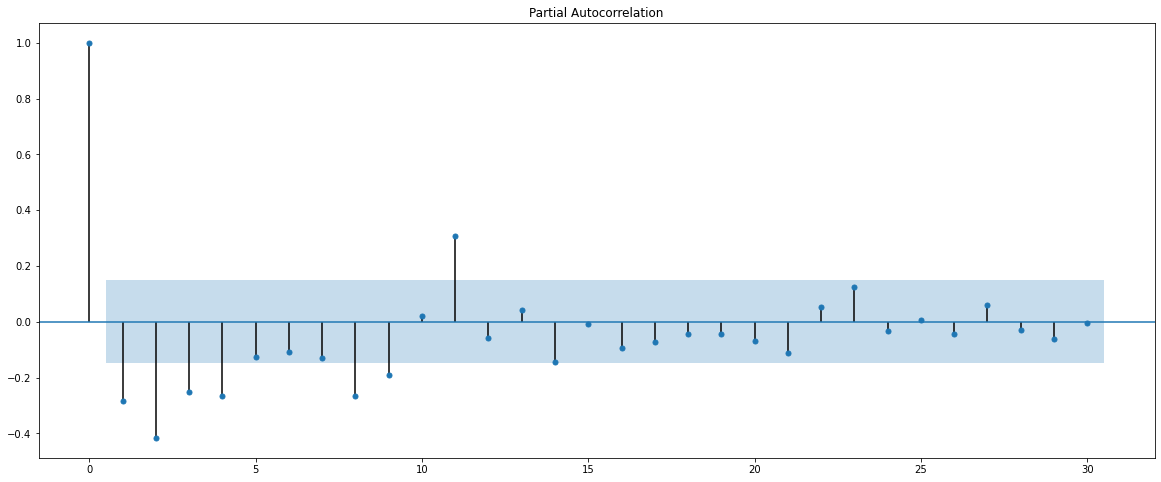

In [213]:
plot_acf((df['Rose'].diff(12).dropna()).diff().dropna(),lags=30)
plot_pacf((df['Rose'].diff(12).dropna()).diff().dropna(),lags=30, method ='ywmle');

In [221]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(2, 1, 2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -334.893
Date:                            Sun, 28 Mar 2021   AIC                            689.786
Time:                                    16:47:15   BIC                            713.730
Sample:                                         0   HQIC                           699.392
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7093      0.403      1.759      0.079      -0.081       1.500
ar.L2         -0.1500      0.176   

In [222]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
res8 = performance(predicted_manual_SARIMA.predicted_mean, 'SARIMA_manual(2,1,2)x(3,1,2,12)')

main_res = pd.concat([main_res,res8])
display(main_res)


For SARIMA_manual(2,1,2)x(3,1,2,12) forecast on the Test Data,  RMSE is 15.156


,Test RMSE
Linear Regression,15.303047
Naive Model,79.281547
Simple Average Model,53.029519
2 point Moving Average Model,11.611515
"Alpha=0.1, SimpleExponentialSmoothing",36.413383
Double exponential Model,15.304860
"Alpha=0.1, Beta=0.1, DExponentialSmoothing",36.449278
"Alpha=0.089, Beta=0.0, Gamma=0.0:Triple exponential Model",14.187579
"Alpha=0.1, Beta=0.4, Gamma=0.3, TripleExponentialSmoothing",12.256893
"ARIMA_auto(3,1,3)",16.216939


In [223]:
test2 = test.copy()
test2['pred'] = predicted_manual_SARIMA.predicted_mean
test2.head()

,Rose,pred
Time_Stamp,,
1991-01-31,54.0,45.321206
1991-02-28,55.0,61.350420
1991-03-31,66.0,67.242957
1991-04-30,65.0,61.320925
1991-05-31,60.0,67.309611


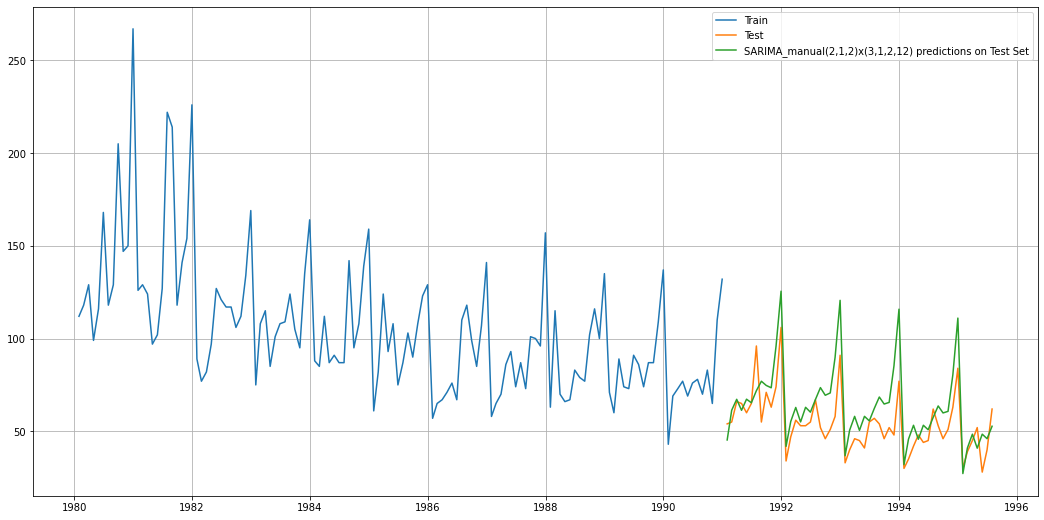

In [225]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(test2['pred'], label='SARIMA_manual(2,1,2)x(3,1,2,12) predictions on Test Set')
plt.legend(loc='best')
plt.grid();

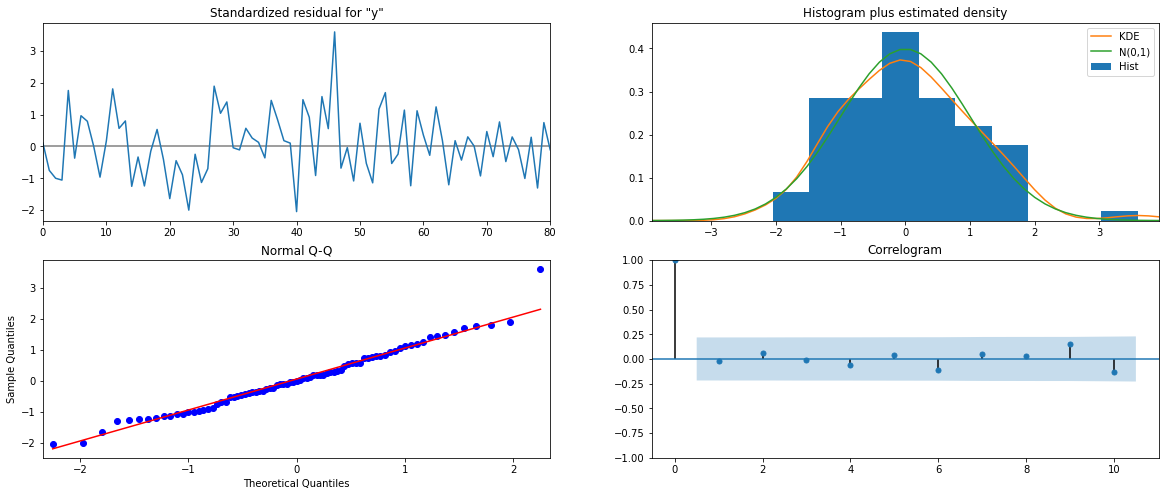

In [227]:
results_manual_SARIMA.plot_diagnostics();

<b> 1.8) Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data. </b>
<a id='1.8'></a>

In [228]:
main_res.sort_values(by = 'Test RMSE', ascending = True)

,Test RMSE
2 point Moving Average Model,11.611515
"Alpha=0.1, Beta=0.4, Gamma=0.3, TripleExponentialSmoothing",12.256893
"Alpha=0.089, Beta=0.0, Gamma=0.0:Triple exponential Model",14.187579
"SARIMA_manual(2,1,2)x(3,1,2,12)",15.155954
Linear Regression,15.303047
Double exponential Model,15.304860
"ARIMA_manual(2,1,2)",15.394437
"ARIMA_auto(3,1,3)",16.216939
"SARIMA_auto(0,1,2)x(2,1,2,12)",16.251218
"Alpha=0.1, SimpleExponentialSmoothing",36.413383


<b> 1.9) Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands. </b>
<a id='1.9'></a>

In [238]:
#Build model on complete data
fullmodel_TES = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='additive',initialization_method='estimated').fit(smoothing_level=0.19,smoothing_slope=0.4,smoothing_seasonal=0.3,optimized=False,use_brute=True)
print(fullmodel_TES.params)

#RMSE
RMSE_fullmodel1 = mean_squared_error(df['Rose'],fullmodel_TES.fittedvalues,squared=False)
print('RMSE of final Triple Exponential Model:',RMSE_fullmodel1)

{'smoothing_level': 0.19, 'smoothing_trend': 0.4, 'smoothing_seasonal': 0.3, 'damping_trend': nan, 'initial_level': 145.27499999999995, 'initial_trend': 0.7643939393939441, 'initial_seasons': array([-30.484375  , -25.046875  , -15.53645833, -30.734375  ,
       -16.46354167,  -9.72395833,  12.44270833,  17.53645833,
         5.55729167,  -3.890625  ,  15.99479167,  80.34895833]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE of final Triple Exponential Model: 20.693547325836125


In [244]:
# Getting the predictions for the next 12 months
prediction = fullmodel_TES.forecast(steps=12)

In [242]:
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(fullmodel.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(fullmodel.resid,ddof=1)})
pred_df

,lower_CI,prediction,upper_ci
1995-08-31,-0.053794,40.613282,81.280357
1995-09-30,-3.786519,36.880557,77.547632
1995-10-31,-2.983684,37.683391,78.350467
1995-11-30,5.650096,46.317171,86.984247
1995-12-31,34.032755,74.699830,115.366906
1996-01-31,-25.785485,14.881591,55.548666
1996-02-29,-17.745047,22.922028,63.589104
1996-03-31,-11.541305,29.125771,69.792846
1996-04-30,-10.041225,30.625850,71.292926
1996-05-31,-21.138171,19.528904,60.195980


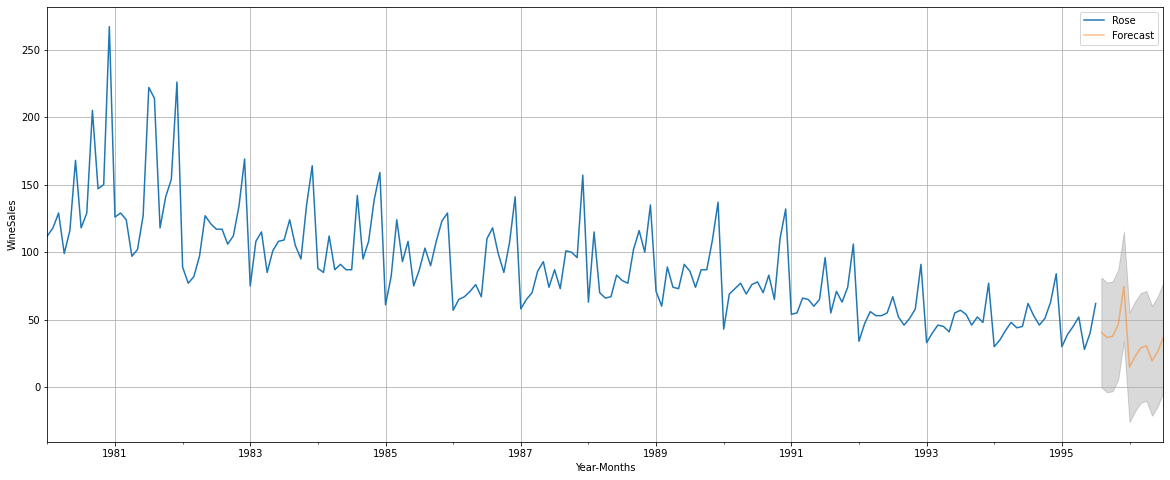

In [254]:
# plot the forecast along with the confidence band

axis = df.plot(label='Actual')
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('WineSales')
plt.legend(loc='best')
plt.grid()
plt.show()

In [246]:
#Building the best optimum model on full data
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(2,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -543.060
Date:                            Sun, 28 Mar 2021   AIC                           1106.120
Time:                                    17:23:17   BIC                           1135.246
Sample:                                01-31-1980   HQIC                          1117.956
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9089      0.185      4.905      0.000       0.546       1.272
ar.L2         -0.1382      0.120   

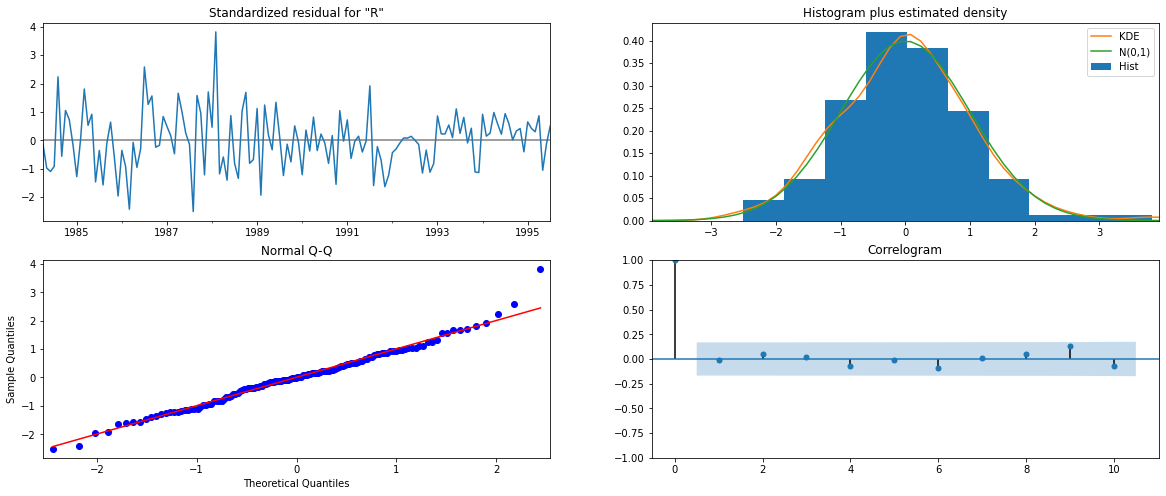

In [247]:
results_full_data_model.plot_diagnostics();

In [248]:
#Prediction for 12 months into the future

predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [249]:
predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).tail()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1996-03-31,40.639841,13.336405,14.500968,66.778714
1996-04-30,41.649149,13.459230,15.269543,68.028755
1996-05-31,33.395658,13.591677,6.756460,60.034855
1996-06-30,39.781486,13.730754,12.869703,66.693269
1996-07-31,54.283760,13.874232,27.090765,81.476755


In [251]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 42.830111196976006


In [252]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

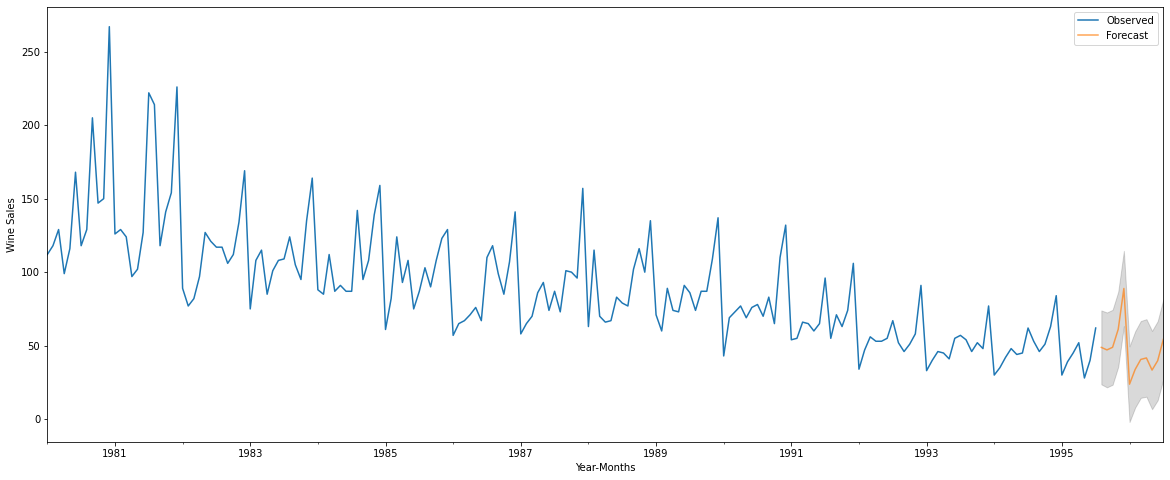

In [253]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Wine Sales')
plt.legend(loc='best')
plt.show()

<b> 1.10) Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales. </b>
<a id='1.10'></a>

The objective of this case study is to analyse and forecast wine sales for next 12 months from the end date in the dataset.

<b>Initial Analysis of the data:</b>

    •	We can observe several characteristics of the series: first, that it shows an initial increase in trend, which drops quickly for years later; Secondly, it presents a seasonal behaviour, which explains these ups and downs, far from the average of the series.
    •	No outliers as the peaks are fully described by the seasonality present in the dataset.
    •	Additive model decomposition is preferred because the seasonality does not change over time, this can be confirmed by the quarterly plot as seen before. 
    •	First order differencing was needed to make the series stationary.
    
<b>Model building findings:</b>

Taking into consideration the initial analysis done, several models were built like Linear regression, Naïve model, Simple average, moving average with different rolling windows, various exponential models and ARIMA/SARIMA.  


Out of the models built, Naïve forecast is the worst in terms of seasonal forecasting followed by double exponential smoothing and linear regression models. SARIMA/ARIMA models are also not giving the best results. Even though 2-point moving average model has the least RMSE on test set compared to others, while forecasting into the future this model might not be the best option since it does not include trend and seasonality components in the model.


Triple exponential smoothing model with alpha = 0.1, beta = 0.4 and gamma = 0.3 gives the optimum model. The baseline prediction for the dataset resulted in an RMSE of 12.25. The chosen model forecasted the next 12 months with an RMSE of 20.69. At 95% confidence, range of the sales is also predicted.


We have considered only sales of the wine for that particular month, if there were other variables like location, outlet type and customers age could also be some important factors affecting the sales which can help us better in forecasting.


<b>Business recommendations:</b>

As we can see from the analysis, the sales for rose wines has been showing a decreasing trend. This may be due to fact that rose wines popularity has also been decreasing in the 20th century and other important factors like location, marketing of rose wine or the taste of the wine which depends on the quality of the ingredients used. In order for ABC Estate wines to get profit from the sales of rose wines like their sparkling wines, few strategies and ideas have been presented for:

    •	Improving the quality of the ingredients used like selective grapes and wine making process. Fine wine are always what the people are looking for.
    •	Rose wine sales are more in the initial years, which means there were people at that time who were fond of rose wine than now. Therefore, for increasing the customer base, company has to spend in advertising and marketing to bring the old tradition back. Social media and influential celebrities have played a major role as trendsetting icons, if marketing is done through these ways it can contribute to the bright future ahead for rose wine sales
    •	ABC estate wine could also target countries and region which has a long-standing heritage in winemaking, coupled with an affluent population that is well aware of the taste, texture and nuances of different types of wines. If ABC wines could make their rose wines a hit in that region then automatically, we can see an increase in the sales.
    •	Host or join events which can include wine tasting. So that people attending the event can be offered a deal in the wine package.
    •	Modern trade segment is twice the size as the usual retail market. ABC estate should take advantage of this while planning their distribution strategies.
    
Above mentioned ideas can help ABC estate wines to get back on track with the market of Rose wines.
